# OUTLIERS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.hbos import HBOS
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from collections import Counter

from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('data/tracks.csv', skipinitialspace=True, header=0)

## preparazione df

In [3]:
#rimuovo duplicati
df = df.drop_duplicates(subset=['id', 'name'])

In [4]:
# rimuovo le colonne altamente correlate
columns_to_remove = ["n_beats", "n_bars", "features_duration_ms", "start_of_fade_out", "album_total_tracks", "tempo"]
df = df.drop(columns=columns_to_remove)

In [5]:
#rimuovo missing value
df = df.dropna()

In [6]:
pd.set_option('display.max_columns', None)
display(df.head())

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,album_release_date_precision,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,2017-09-22,day,0.532,0.517,0,-9.846,1,0.4930,0.5470,0.535,0.0854,0.2390,3,0.020,1.000,0.500,0.525,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,2014-10-27,day,0.750,0.340,5,-12.759,0,0.0326,0.1670,0.648,0.1060,0.1450,4,0.678,0.326,0.410,0.589,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,2018-06-22,day,0.801,0.639,7,-10.681,0,0.1040,0.0290,0.466,0.0688,0.3200,3,0.847,0.457,0.904,0.760,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,day,0.675,0.543,6,-11.983,0,0.0639,0.0484,0.719,0.1120,0.0374,4,0.882,0.498,0.512,0.503,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,day,0.761,0.671,11,-13.346,0,0.0418,0.5130,0.917,0.1150,0.1190,4,0.882,1.000,0.474,0.459,minimal-techno


In [7]:
# prendo in considerazione solo le colonne numeriche
features = ['duration_ms','popularity','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
df = df[features]

In [8]:
# tolgo le righe con varianza 0
df = df.loc[:, df.var() != 0]

In [9]:
df.head()

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,290479,52,0.532,0.517,-9.846,0.4930,0.5470,0.535,0.0854,0.2390
1,539229,45,0.750,0.340,-12.759,0.0326,0.1670,0.648,0.1060,0.1450
2,264200,39,0.801,0.639,-10.681,0.1040,0.0290,0.466,0.0688,0.3200
3,387413,0,0.675,0.543,-11.983,0.0639,0.0484,0.719,0.1120,0.0374
4,248956,0,0.761,0.671,-13.346,0.0418,0.5130,0.917,0.1150,0.1190


In [10]:
# Memorizza i nomi originali delle colonne
#original_columns = df.columns.tolist()

# Standardizzazione dei dati
#scaler = StandardScaler()
#df = scaler.fit_transform(df)

# Convertire df_standardized in DataFrame pandas
#df = pd.DataFrame(df, columns=original_columns)

In [11]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [12]:
# Convertire df in DataFrame pandas
df = pd.DataFrame(df)

# Iniziamo 

In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000,89562.000000
mean,0.053490,0.331141,0.570645,0.634470,0.758930,0.090666,0.329370,0.173650,0.217077,0.471802
std,0.024748,0.226581,0.179442,0.256697,0.096644,0.117470,0.339720,0.324020,0.194989,0.264275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039979,0.157895,0.456853,0.457000,0.725154,0.037306,0.017169,0.000000,0.098200,0.250251
50%,0.049774,0.326316,0.584772,0.677000,0.783281,0.050777,0.187751,0.000058,0.132000,0.459296
75%,0.062174,0.505263,0.702538,0.853000,0.821708,0.089016,0.627510,0.098200,0.279000,0.686432
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


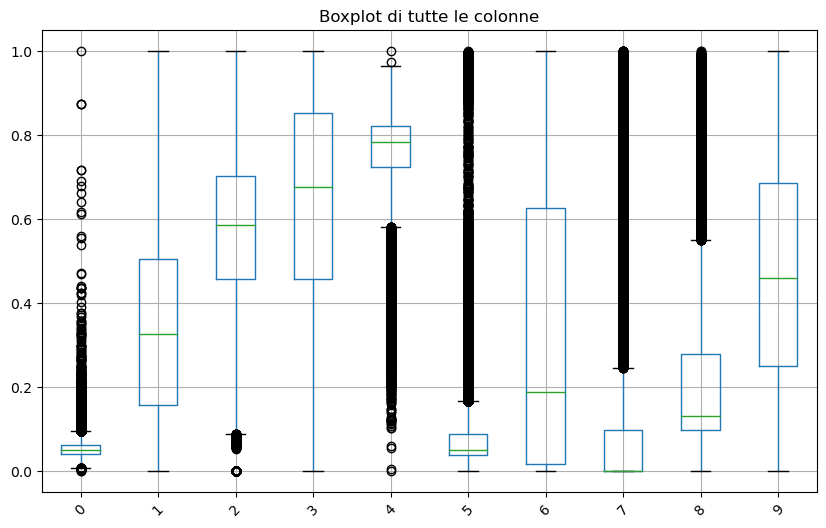

In [14]:
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)  # Ruota le etichette dell'asse x se sono molte o lunghe
plt.title('Boxplot di tutte le colonne')
plt.show()

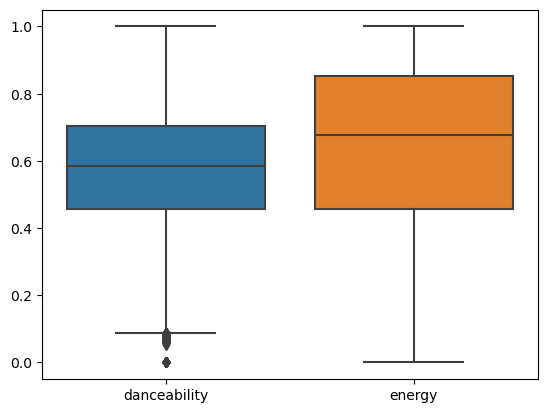

In [15]:
idx0 = 2  # danceability
idx1 = 3  # energy

# Selezione delle colonne utilizzando .iloc
data = [df.iloc[:, idx0], df.iloc[:, idx1]]

sns.boxplot(data=data)
plt.xticks([0, 1], ['danceability', 'energy'])
plt.show()

In [16]:
colonne = [0, 2, 4, 5, 7, 8]
df_sub = df.iloc[:, colonne]

In [17]:
df_sub.head()

,0,2,4,5,7,8
0,0.068559,0.540102,0.734051,0.510881,0.535,0.0854
1,0.129058,0.761421,0.680169,0.033782,0.648,0.1060
2,0.062168,0.813198,0.718606,0.107772,0.466,0.0688
3,0.092135,0.685279,0.694523,0.066218,0.719,0.1120
4,0.058460,0.772589,0.669312,0.043316,0.917,0.1150


In [18]:
X = df_sub.values
X.shape

(89562, 6)

### Rilevamento outliers

In [19]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

In [20]:
# Assicurati di applicare la funzione sul DataFrame corretto
outliers_dict = {}
for col in df.columns:  # Assuming df is the scaled DataFrame
    outliers_dict[col] = is_outlier(X[col])

# Conversione del dizionario in un DataFrame
outliers_df = pd.DataFrame(outliers_dict)

# Visualizzazione del numero di outlier per colonna
print(outliers_df.sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [21]:
# Assumendo che df sia il DataFrame e is_outlier sia definito
outliers = is_outlier(df.iloc[:, 0], k=1.5)
np.unique(outliers, return_counts=True)

(array([False,  True]), array([85345,  4217], dtype=int64))

# DENSITY-BASED AL --> lof anh hbos

# LOF

In [22]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [23]:
# Applica l'algoritmo LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)
scores = lof.negative_outlier_factor_


In [24]:
# Calcola il numero di outliers (1% del dataset)
num_outliers = int(0.01 * len(df_sub))

In [25]:
# Identifica gli outliers in base ai punteggi LOF più bassi
threshold = sorted(scores)[num_outliers]
df_sub['LOF_Score'] = scores
df_sub['Outlier'] = scores < threshold

C:\Users\Elisa\AppData\Local\Temp\ipykernel_23356\451256867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['LOF_Score'] = scores
C:\Users\Elisa\AppData\Local\Temp\ipykernel_23356\451256867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Outlier'] = scores < threshold


In [26]:
print(df_sub.head())

          0         2         4         5      7       8  LOF_Score  Outlier
0  0.068559  0.540102  0.734051  0.510881  0.535  0.0854  -1.314407    False
1  0.129058  0.761421  0.680169  0.033782  0.648  0.1060  -1.102768    False
2  0.062168  0.813198  0.718606  0.107772  0.466  0.0688  -1.034091    False
3  0.092135  0.685279  0.694523  0.066218  0.719  0.1120  -1.044538    False
4  0.058460  0.772589  0.669312  0.043316  0.917  0.1150  -0.996771    False


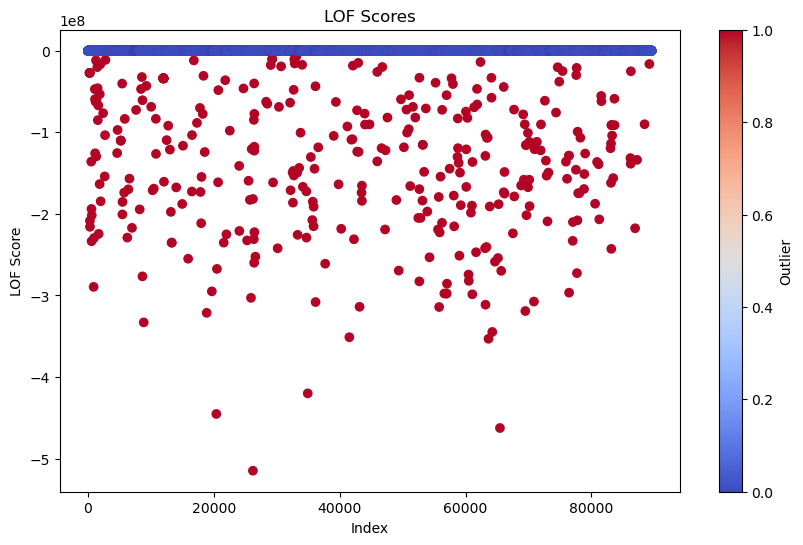

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df_sub.index, scores, c=df_sub['Outlier'], cmap='coolwarm')
plt.title('LOF Scores')
plt.xlabel('Index')
plt.ylabel('LOF Score')
plt.colorbar(label='Outlier')
plt.show()

In [28]:
print(f"Numero di outliers trovati: {df_sub['Outlier'].sum()}")

Numero di outliers trovati: 895


# visualizzazione con PCA


In [29]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

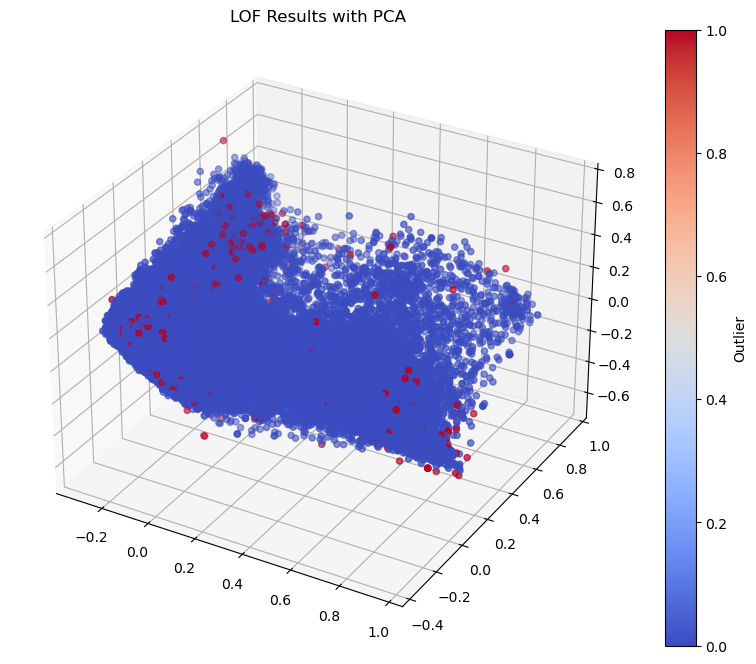

In [30]:
# Visualizzazione dei risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_sub['Outlier'], cmap='coolwarm', marker='o')
plt.title('LOF Results with PCA')
plt.colorbar(sc, label='Outlier')
plt.show()

# HBOS

In [31]:
# Applica l'algoritmo HBOS
hbos = HBOS()
hbos.fit(X)
hbos_scores = hbos.decision_function(X)

In [32]:
# Calcola il numero di outliers (1% del dataset)
num_outliers = int(0.01 * len(df_sub))

In [33]:
# Identifica gli outliers in base ai punteggi HBOS più alti
threshold = sorted(hbos_scores, reverse=True)[num_outliers]
df_sub['HBOS_Score'] = hbos_scores
df_sub['Outlier'] = hbos_scores > threshold

C:\Users\Elisa\AppData\Local\Temp\ipykernel_23356\758776800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['HBOS_Score'] = hbos_scores
C:\Users\Elisa\AppData\Local\Temp\ipykernel_23356\758776800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Outlier'] = hbos_scores > threshold


In [34]:
# Riduzione dimensionale a 3 componenti con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

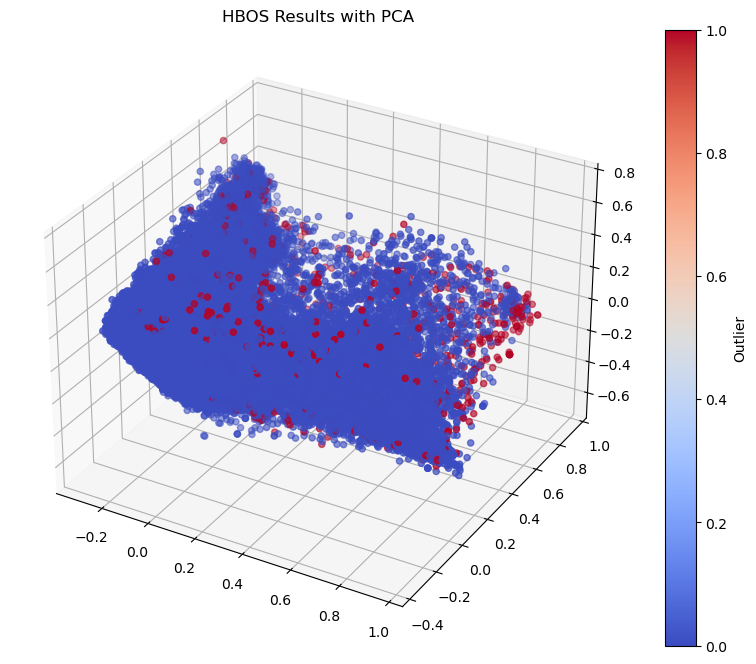

In [35]:
# Visualizzazione dei risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_sub['Outlier'], cmap='coolwarm', marker='o')
plt.title('HBOS Results with PCA')
plt.colorbar(sc, label='Outlier')
plt.show()


In [36]:
print(f"Numero di outliers trovati: {df_sub['Outlier'].sum()}")

Numero di outliers trovati: 895


# Distance-based

# KNN

In [37]:
# Applica l'algoritmo KNN
knn = NearestNeighbors(n_neighbors=20)
knn.fit(X)
distances, indices = knn.kneighbors(X)

In [38]:
outlier_scores = distances[:, -1]

In [39]:
num_outliers = int(0.01 * len(X))

In [40]:
threshold = sorted(outlier_scores, reverse=True)[num_outliers]
df_sub['KNN_Score'] = outlier_scores
df_sub['Outlier'] = outlier_scores > threshold

In [41]:
print(f"Numero di outliers trovati: {df_sub['Outlier'].sum()}")

Numero di outliers trovati: 895


In [42]:
# Riduzione dimensionale a 3 componenti con PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

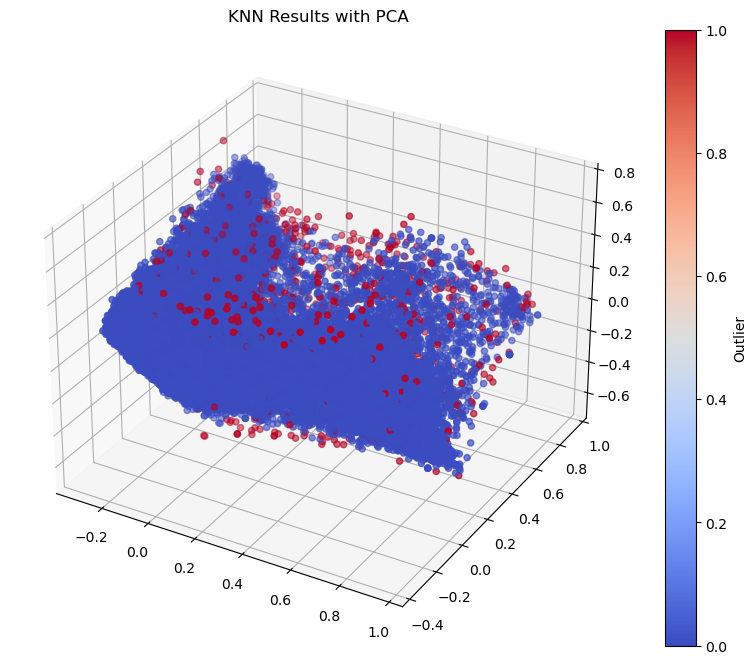

In [43]:
# Visualizzazione dei risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df_sub['Outlier'], cmap='coolwarm', marker='o')
plt.title('KNN Results with PCA')
plt.colorbar(sc, label='Outlier')

plt.show()


In [44]:
print(f"Numero di outliers trovati: {df_sub['Outlier'].sum()}")

Numero di outliers trovati: 895


# Angle-based

# isolation forest

In [45]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X)

IsolationForest(contamination=0.01, random_state=42)

In [46]:
predictions = model.predict(X)

In [47]:
# Gli outlier avranno un valore di -1, i normali dati un valore di 1
outliers = X[predictions == -1]
normal_data = X[predictions == 1]

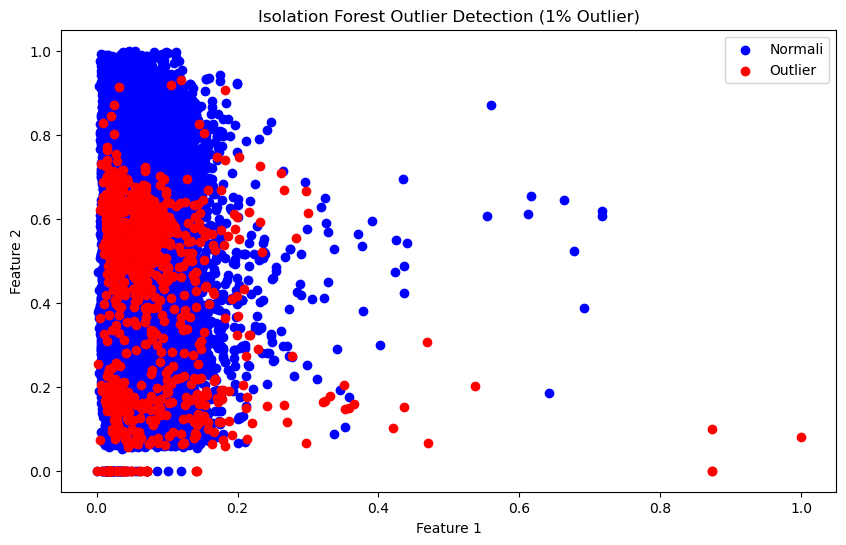

In [48]:
# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normali')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outlier')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Outlier Detection (1% Outlier)')
plt.show()

### visualizzazione con PCA

In [49]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

In [50]:
# Separiamo i dati ridotti in outlier e normali
outliers_reduced = X_reduced[predictions == -1]
normal_data_reduced = X_reduced[predictions == 1]


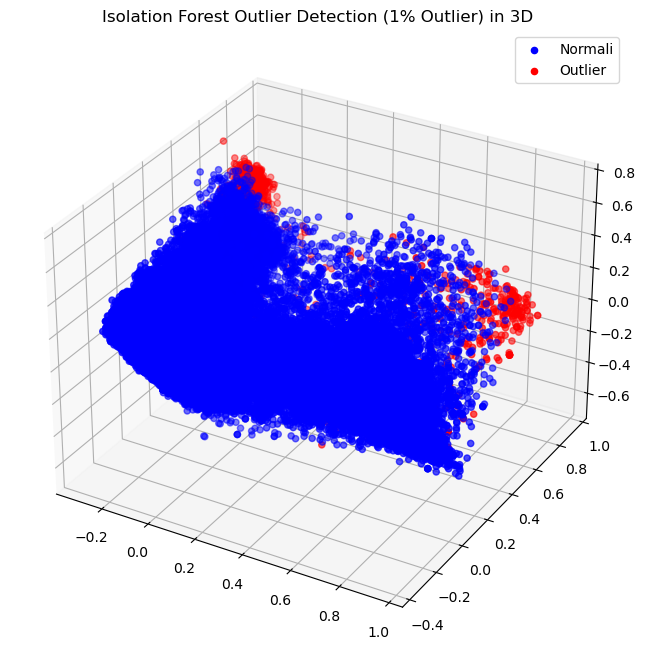

In [51]:
# Visualizziamo i risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal_data_reduced[:, 0], normal_data_reduced[:, 1], normal_data_reduced[:, 2], c='blue', label='Normali')
ax.scatter(outliers_reduced[:, 0], outliers_reduced[:, 1], outliers_reduced[:, 2], c='red', label='Outlier')

ax.set_title('Isolation Forest Outlier Detection (1% Outlier) in 3D')
ax.legend()

plt.show()

In [52]:
num_outliers_if = np.sum(predictions == -1)
print(f"Numero di outlier rilevati da Isolation Forest: {num_outliers_if}")

Numero di outlier rilevati da Isolation Forest: 896


# ABOD

In [53]:
model = ABOD(contamination=0.01)
model.fit(X)

C:\Users\Elisa\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Elisa\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\Elisa\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [54]:
predictions = model.labels_  

In [55]:
# Separiamo i dati ridotti in outlier e normali
outliers = X[predictions == 1]
normal_data = X[predictions == 0]

In [56]:
# Riduciamo i dati a 3 dimensioni usando PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)


In [57]:
# Separiamo i dati ridotti in outlier e normali
outliers_reduced = X_reduced[predictions == 1]
normal_data_reduced = X_reduced[predictions == 0]

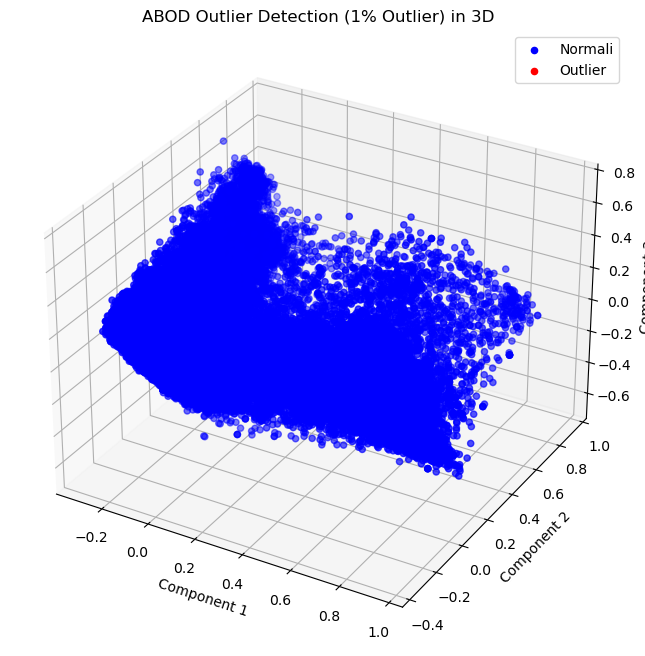

In [58]:
# Visualizziamo i risultati in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal_data_reduced[:, 0], normal_data_reduced[:, 1], normal_data_reduced[:, 2], c='blue', label='Normali')
ax.scatter(outliers_reduced[:, 0], outliers_reduced[:, 1], outliers_reduced[:, 2], c='red', label='Outlier')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('ABOD Outlier Detection (1% Outlier) in 3D')
ax.legend()

plt.show()